Random forests are an optimized version of bagging with decision trees.

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt

In [3]:
titanic = sns.load_dataset('titanic')

# Drop rows with missing values for simplicity
titanic = titanic.dropna(subset=['age', 'embarked'])

# Convert categorical variables to dummy/indicator variables
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked'], drop_first=True)

X = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q', 'embarked_S']]
y = titanic['survived']

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred = rnd_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


In [8]:
# Get feature importances
importances = rnd_clf.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importances)

      Feature  Importance
5    sex_male    0.420520
4        fare    0.186868
0      pclass    0.165526
1         age    0.124923
2       sibsp    0.045750
3       parch    0.036197
7  embarked_S    0.017114
6  embarked_Q    0.003102


<ipython-input-9-91c2a0426d24>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


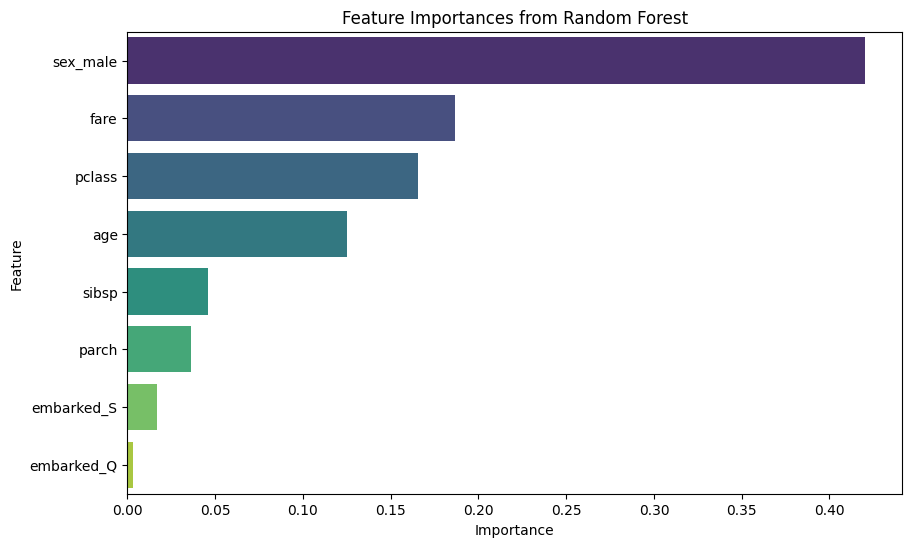

In [9]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.show()